In [1]:
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.preprocessing import RobustScaler
#from sklearn.model_selection import StratifiedShuffleSplit
#from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [3]:
corp=pd.read_table(r"C:\Users\1\Desktop\New folder (2)\XYZCorp_LendingData.txt",low_memory=False,delimiter='\t', header =0)

In [4]:
# Dividing total data in to 2 parts i.e.train and test
train=corp.iloc[0:450000,:]
train.shape

(450000, 73)

In [5]:
train.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,4.500000e+05,4.500000e+05,450000.000000,450000.000000,450000.00000,450000,450000.000000,450000.000000,450000,450000,...,0.0,0.0,0.0,0.0,0.0,3.826870e+05,0.0,0.0,0.0,450000.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,326921,NaN,NaN,133611,30999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.306720e+07,1.458524e+07,14307.723056,14282.627889,14226.71385,NaN,13.771997,431.660367,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.049846e+04,NaN,NaN,NaN,0.095762
std,1.089785e+07,1.168547e+07,8278.079914,8265.367632,8278.00466,NaN,4.355543,243.146181,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.758362e+04,NaN,NaN,NaN,0.294265
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.00000,NaN,5.420000,15.690000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.000000
25%,3.634249e+06,4.369840e+06,8000.000000,8000.000000,8000.00000,NaN,10.750000,256.300000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.360000e+04,NaN,NaN,NaN,0.000000
50%,1.009305e+07,1.192259e+07,12000.000000,12000.000000,12000.00000,NaN,13.650000,379.525000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.290000e+04,NaN,NaN,NaN,0.000000
75%,2.073151e+07,2.300192e+07,20000.000000,20000.000000,19950.00000,NaN,16.290000,565.980000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.800000e+04,NaN,NaN,NaN,0.000000


In [9]:
test=corp.iloc[450000:855969,:]
test.shape

(405969, 73)

In [6]:
# Unique value column treatment for train data:
def find_constant_features(train):
    const_features = []
    for column in list(train.columns):
        if train[column].unique().size < 2:
            const_features.append(column)
    return const_features
const_features = find_constant_features(train)
print(const_features)

['policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']


In [7]:
train=train.drop(['policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint',
                 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 
                 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 
                 'inq_last_12m'], axis = 1)

In [10]:
# Unique value column treatment for test data:
def find_constant_features(test):
    const_features = []
    for column in list(test.columns):
        if test[column].unique().size < 2:
            const_features.append(column)
    return const_features
const_features = find_constant_features(test)
print(const_features)

['policy_code']


In [11]:
test=test.drop(['policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint',
                 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 
                 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 
                 'inq_last_12m'], axis = 1)

In [12]:
train.shape,test.shape

((450000, 54), (405969, 54))

In [13]:
# Missing value treatment for train data:
train_na=100*train.isnull().sum()/len(train)
train_na.sort_values(ascending=False)

mths_since_last_record         86.764000
mths_since_last_major_derog    78.847778
desc                           73.126667
mths_since_last_delinq         53.949778
next_pymnt_d                   50.276889
tot_cur_bal                    14.958444
tot_coll_amt                   14.958444
total_rev_hi_lim               14.958444
emp_title                       5.886000
emp_length                      4.502222
last_pymnt_d                    0.080444
revol_util                      0.064444
collections_12_mths_ex_med      0.012444
last_credit_pull_d              0.008889
title                           0.004000
annual_inc                      0.000000
purpose                         0.000000
pymnt_plan                      0.000000
issue_d                         0.000000
verification_status             0.000000
grade                           0.000000
home_ownership                  0.000000
sub_grade                       0.000000
addr_state                      0.000000
installment     

In [14]:
maxna=train.columns[train_na>75]
maxna

Index(['mths_since_last_record', 'mths_since_last_major_derog'], dtype='object')

In [15]:
train=train.drop(["mths_since_last_major_derog", "mths_since_last_record","desc"], axis=1)

In [16]:
train=train.drop(['id', 'member_id','grade', 'sub_grade','issue_d','zip_code', 'addr_state','recoveries',
            'collection_recovery_fee', 'last_pymnt_d','next_pymnt_d', 'last_credit_pull_d'], axis=1)

In [17]:
# Imputing NA values in train data:
train.emp_length=train.emp_length.fillna('0')
train['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True) # replace 10+ by value
train['emp_length'] = train['emp_length'].astype(int) # convert emp_length as integer type

In [18]:
train.emp_title=train.emp_title.fillna('Teacher')
train.title=train.title.fillna('Debt consolidation')
train.revol_util=train.revol_util.fillna(0)
train.total_rev_hi_lim=train.total_rev_hi_lim.fillna(train.total_rev_hi_lim.mean())
train.tot_cur_bal=train.tot_cur_bal.fillna(train.tot_cur_bal.mean())
train.tot_coll_amt=train.tot_coll_amt.fillna(train.tot_coll_amt.mean())
train.mths_since_last_delinq =train.mths_since_last_delinq.fillna(9)
train.collections_12_mths_ex_med =train.collections_12_mths_ex_med.fillna(0)

In [19]:
# Missing value treatment for test data:
test_na=100*test.isnull().sum()/len(test)
test_na.sort_values(ascending=False)

desc                           99.782742
mths_since_last_record         82.357766
mths_since_last_major_derog    70.945072
mths_since_last_delinq         48.535233
next_pymnt_d                    6.583015
emp_title                       5.654619
emp_length                      5.616439
last_pymnt_d                    2.093756
revol_util                      0.038427
title                           0.003695
last_credit_pull_d              0.002463
funded_amnt_inv                 0.000000
issue_d                         0.000000
addr_state                      0.000000
zip_code                        0.000000
member_id                       0.000000
purpose                         0.000000
loan_amnt                       0.000000
pymnt_plan                      0.000000
annual_inc                      0.000000
verification_status             0.000000
home_ownership                  0.000000
delinq_2yrs                     0.000000
sub_grade                       0.000000
grade           

In [20]:
test=test.drop(["mths_since_last_major_derog", "mths_since_last_record","desc"], axis=1)

In [21]:
test=test.drop(['id', 'member_id','grade', 'sub_grade','issue_d','zip_code', 'addr_state','recoveries',
            'collection_recovery_fee', 'last_pymnt_d','next_pymnt_d', 'last_credit_pull_d'], axis=1)

In [22]:
# Imputing NA values in test data:
test.emp_length=test.emp_length.fillna('0')
test['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True) # replace 10+ by value
test['emp_length'] = test['emp_length'].astype(int) # convert emp_length as integer type

In [23]:
test.emp_title=test.emp_title.fillna('Teacher')
test.mths_since_last_delinq =test.mths_since_last_delinq.fillna(9)
test.revol_util=test.revol_util.fillna(0)
test.title=test.title.fillna('Debt consolidation')

0    406907
1     43093
Name: default_ind, dtype: int64

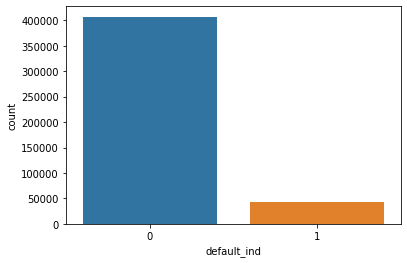

In [24]:
# Plotting target feature:
sns.countplot(train['default_ind'])
train['default_ind'].value_counts()

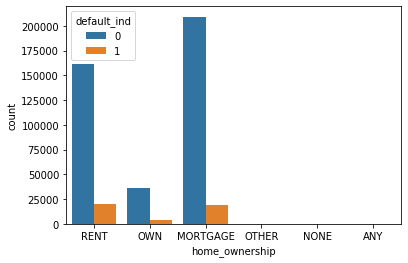

In [25]:
sns.countplot(train['home_ownership'],hue=train['default_ind'])


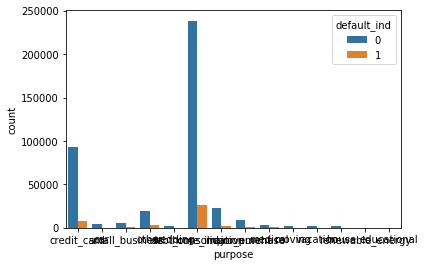

In [26]:
sns.countplot(train['purpose'],hue=train['default_ind'])


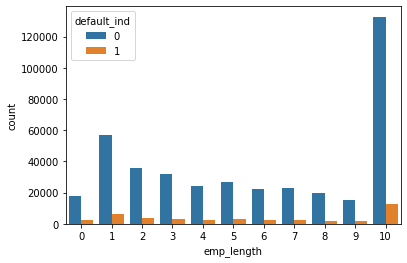

In [27]:
sns.countplot(train['emp_length'],hue=train['default_ind'])


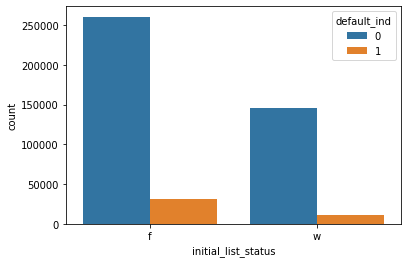

In [28]:
sns.countplot(train['initial_list_status'],hue=train['default_ind'])

In [29]:
# Divide train data in to numeric and categorical part:
train_numeric = train.select_dtypes(include=[np.number])
train_cat =train.select_dtypes(exclude=[np.number])
train_numeric.shape,train_cat.shape

((450000, 30), (450000, 9))

In [30]:
train_cat.columns

Index(['term', 'emp_title', 'home_ownership', 'verification_status',
       'pymnt_plan', 'purpose', 'title', 'earliest_cr_line',
       'initial_list_status'],
      dtype='object')

In [31]:
#  categorical feature of train data:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_cat.term=le.fit_transform(train_cat.term)
train_cat.emp_title=le.fit_transform(train_cat.emp_title)
train_cat.home_ownership=le.fit_transform(train_cat.home_ownership)
train_cat.verification_status=le.fit_transform(train_cat.verification_status)
train_cat.pymnt_plan=le.fit_transform(train_cat.pymnt_plan)
train_cat.purpose=le.fit_transform(train_cat.purpose)
train_cat.title=le.fit_transform(train_cat.title)
train_cat.earliest_cr_line=le.fit_transform(train_cat.earliest_cr_line)
train_cat.initial_list_status=le.fit_transform(train_cat.initial_list_status)

C:\Users\1\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [32]:
train_new=pd.concat([train_numeric,train_cat],axis=1)

In [33]:
#  Dividing test data in to numeric and categorical part:
test_numeric = test.select_dtypes(include=[np.number])
test_cat =test.select_dtypes(exclude=[np.number])
test_numeric.shape,test_cat.shape

((405969, 30), (405969, 9))

In [34]:
test_cat.columns

Index(['term', 'emp_title', 'home_ownership', 'verification_status',
       'pymnt_plan', 'purpose', 'title', 'earliest_cr_line',
       'initial_list_status'],
      dtype='object')

In [35]:
# categorical features of test data:
test_cat.term = le.fit_transform(test_cat.term)
test_cat.emp_title = le.fit_transform(test_cat.emp_title)
test_cat.home_ownership = le.fit_transform(test_cat.home_ownership)
test_cat.verification_status = le.fit_transform(test_cat.verification_status)
test_cat.pymnt_plan = le.fit_transform(test_cat.pymnt_plan)
test_cat.purpose = le.fit_transform(test_cat.purpose)
test_cat.title = le.fit_transform(test_cat.title)
test_cat.earliest_cr_line = le.fit_transform(test_cat.earliest_cr_line)
test_cat.initial_list_status = le.fit_transform(test_cat.initial_list_status)

In [36]:
test_new=pd.concat([test_numeric,test_cat],axis=1)

In [37]:
train_new.shape,test_new.shape

((450000, 39), (405969, 39))

In [38]:
# co-relation b/w in features:
cor = train_new.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor >0.55) | (cor < -0.55)]

funded_amnt       loan_amnt          0.998553
funded_amnt_inv   loan_amnt          0.995297
                  funded_amnt        0.997026
installment       loan_amnt          0.949588
                  funded_amnt        0.951719
                  funded_amnt_inv    0.948493
total_acc         open_acc           0.681532
out_prncp_inv     out_prncp          0.999998
total_pymnt       loan_amnt          0.745412
                  funded_amnt        0.744943
                  funded_amnt_inv    0.740523
                  installment        0.765698
total_pymnt_inv   loan_amnt          0.745170
                  funded_amnt        0.745003
                  funded_amnt_inv    0.746302
                  installment        0.765531
                  total_pymnt        0.996762
total_rec_prncp   loan_amnt          0.616749
                  funded_amnt        0.616306
                  funded_amnt_inv    0.611840
                  installment        0.666820
                  total_pymnt     

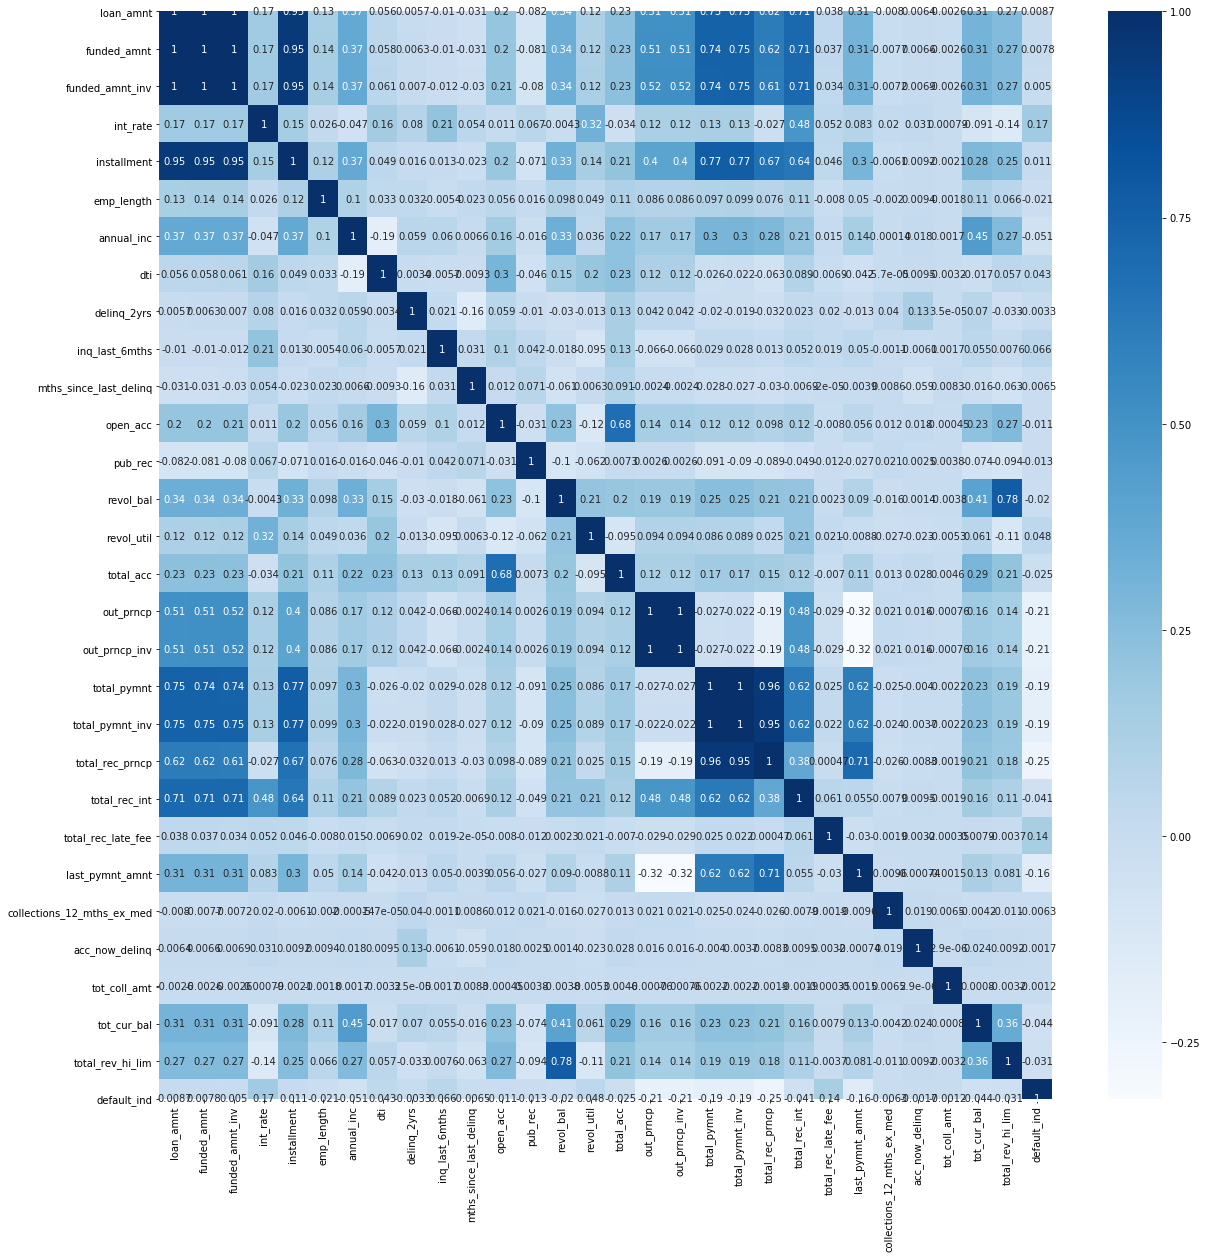

In [39]:
plt.figure(figsize=(20,20))
cor=train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Blues)
plt.show()

In [40]:
# Dropping highly corelated features from train data:
train_new=train_new.drop(["funded_amnt", "total_rev_hi_lim", "last_pymnt_amnt", "total_rec_int", "total_rec_prncp",
           "total_pymnt_inv", "total_pymnt", "out_prncp_inv", "total_acc", "installment", "funded_amnt_inv"], axis=1)

In [41]:
# Dropping highly corelated features from test data:
test_new=test_new.drop(["funded_amnt", "total_rev_hi_lim", "last_pymnt_amnt", "total_rec_int", "total_rec_prncp",
           "total_pymnt_inv", "total_pymnt", "out_prncp_inv", "total_acc", "installment", "funded_amnt_inv"], axis=1)

In [42]:
train_new.shape,test_new.shape

((450000, 28), (405969, 28))

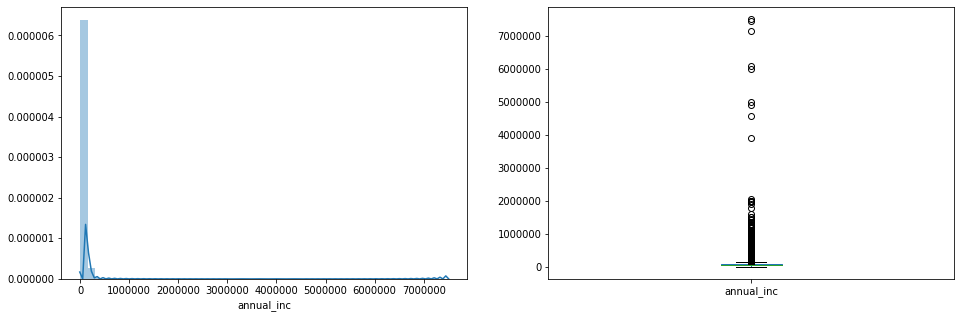

In [43]:
# annual income
plt.figure(1)
plt.subplot(121)
sns.distplot(train_new['annual_inc']);

plt.subplot(122)
train_new['annual_inc'].plot.box(figsize=(16,5))

plt.show()


In [44]:
# Outliers Treatment
#Find mean of the column "dti"
annual_inc_mean = int(train_new['annual_inc'].mean())

#FInd 75th Percentile of the column "dti"
IQR_annual_inc_P75 = train_new['annual_inc'].quantile(q=0.75)

#FInd 25th Percentile of the column "dti"
IQR_annual_inc_P25 = train_new['annual_inc'].quantile(q=0.25)

#FInd IQR of the column "dti"
IQR_annual_inc = IQR_annual_inc_P75-IQR_annual_inc_P25

#Fix boundaries to detect outliers in column "dti"
IQR_LL = int(IQR_annual_inc_P25 - 1.5*IQR_annual_inc)
IQR_UL = int(IQR_annual_inc_P75 + 1.5*IQR_annual_inc)

#treating upper end outier with mean
train_new.loc[train_new['annual_inc']>IQR_UL , 'annual_inc'] = annual_inc_mean

#treating lower end outlier as mean
train_new.loc[train_new['annual_inc']<IQR_LL , 'annual_inc'] = annual_inc_mean


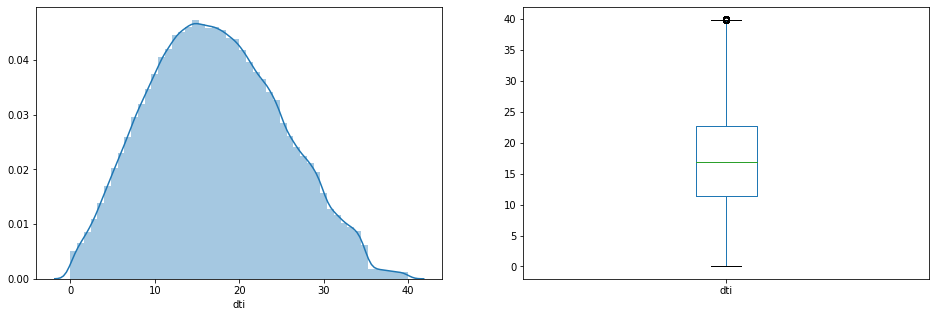

In [43]:
# dti
plt.figure(1)
plt.subplot(121)
sns.distplot(train_new['dti']);

plt.subplot(122)
train_new['dti'].plot.box(figsize=(16,5))

plt.show()


In [44]:
#Outliers Treatment
#Find mean of the column "dti"
dti_mean = int(train_new['dti'].mean())

#FInd 75th Percentile of the column "dti"
IQR_dti_P75 = train_new['dti'].quantile(q=0.75)

#FInd 25th Percentile of the column "dti"
IQR_dti_P25 = train_new['dti'].quantile(q=0.25)

#FInd IQR of the column "dti"
IQR_dti = IQR_dti_P75-IQR_dti_P25

#Fix boundaries to detect outliers in column "dti"
IQR_LL = int(IQR_dti_P25 - 1.5*IQR_dti)
IQR_UL = int(IQR_dti_P75 + 1.5*IQR_dti)

#treating upper end outier with mean
train_new.loc[train_new['dti']>IQR_UL , 'dti'] = dti_mean

#treating lower end outlier as mean
train_new.loc[train_new['dti']<IQR_LL , 'dti'] = dti_mean


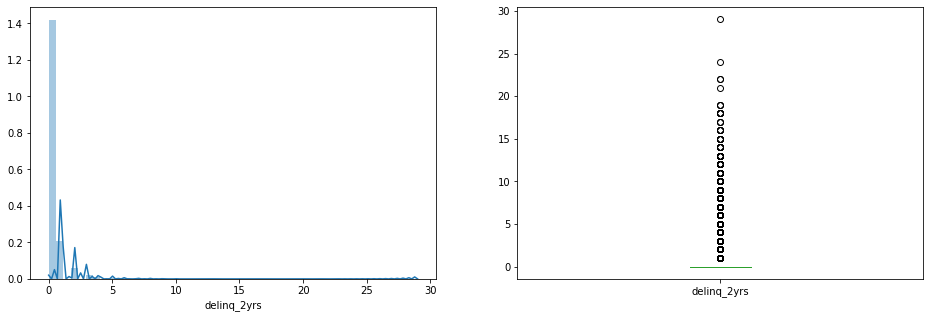

In [45]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_new['delinq_2yrs']);

plt.subplot(122)
train_new['delinq_2yrs'].plot.box(figsize=(16,5))

plt.show()


In [46]:
# Outliers Treatment
#Find mean of the column "delinq_2yrs"
delinq_2yrs_mean = int(train_new['delinq_2yrs'].mean())

#FInd 75th Percentile of the column "delinq_2yrs"
IQR_delinq_2yrs_P75 = train_new['delinq_2yrs'].quantile(q=0.75)

#FInd 25th Percentile of the column "delinq_2yrs"
IQR_delinq_2yrs_P25 = train_new['delinq_2yrs'].quantile(q=0.25)

#FInd IQR of the column "dti"
IQR_delinq_2yrs = IQR_delinq_2yrs_P75-IQR_delinq_2yrs_P25

#Fix boundaries to detect outliers in column "dti"
IQR_LL = int(IQR_delinq_2yrs_P25 - 1.5*IQR_delinq_2yrs)
IQR_UL = int(IQR_delinq_2yrs_P75 + 1.5*IQR_delinq_2yrs)

#treating upper end outier with mean
train_new.loc[train_new['delinq_2yrs']>IQR_UL , 'delinq_2yrs'] = dti_mean

#treating lower end outlier as mean
train_new.loc[train_new['delinq_2yrs']<IQR_LL , 'delinq_2yrs'] = dti_mean


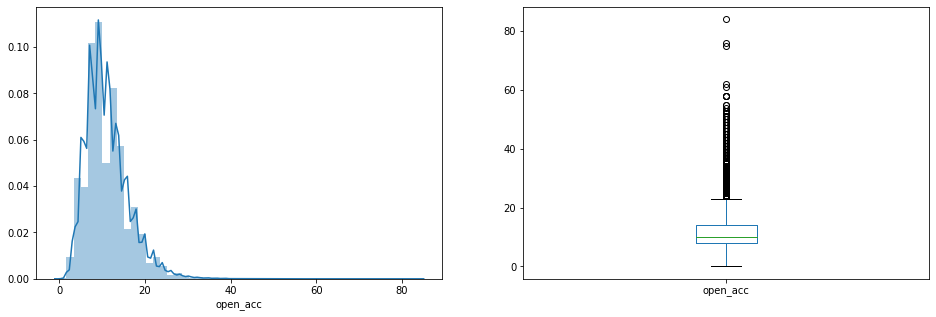

In [47]:
# open_acc
plt.figure(1)
plt.subplot(121)
sns.distplot(train_new['open_acc']);

plt.subplot(122)
train_new['open_acc'].plot.box(figsize=(16,5))

plt.show()


In [48]:
# Outliers Treatment
#Find mean of the column "open_acc"
open_acc_mean = int(train_new['open_acc'].mean())

#FInd 75th Percentile of the column "open_acc"
IQR_open_acc_P75 = train_new['open_acc'].quantile(q=0.75)

#FInd 25th Percentile of the column "open_acc"
IQR_open_acc_P25 = train_new['open_acc'].quantile(q=0.25)

#FInd IQR of the column "open_acc"
IQR_open_acc = IQR_open_acc_P75-IQR_open_acc_P25

#Fix boundaries to detect outliers in column "open_acc"
IQR_LL = int(IQR_open_acc_P25 - 1.5*IQR_open_acc)
IQR_UL = int(IQR_open_acc_P75 + 1.5*IQR_open_acc)

#treating upper end outier with mean
train_new.loc[train_new['open_acc']>IQR_UL , 'open_acc'] = open_acc_mean

#treating lower end outlier as mean
train_new.loc[train_new['open_acc']<IQR_LL , 'open_acc'] = open_acc_mean


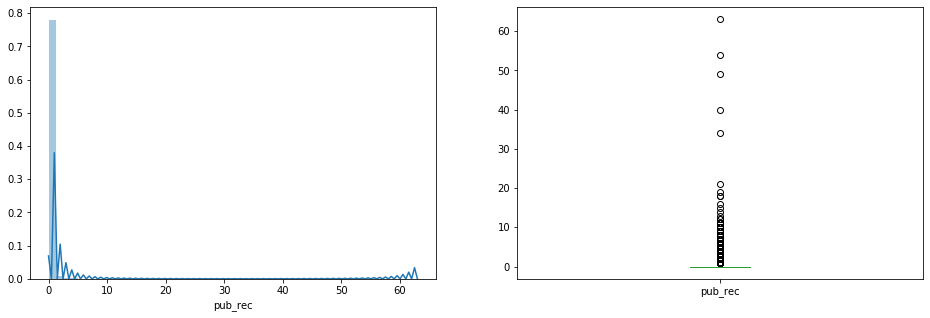

In [49]:
# pub_rec
plt.figure(1)
plt.subplot(121)
sns.distplot(train_new['pub_rec']);

plt.subplot(122)
train_new['pub_rec'].plot.box(figsize=(16,5))

plt.show()


In [50]:
# Outliers Treatment
#Find mean of the column "pub_rec"
pub_rec_mean = int(train_new['pub_rec'].mean())

#FInd 75th Percentile of the column "pub_rec"
IQR_pub_rec_P75 = train_new['pub_rec'].quantile(q=0.75)

#FInd 25th Percentile of the column "pub_rec"
IQR_pub_rec_P25 = train_new['pub_rec'].quantile(q=0.25)

#FInd IQR of the column "pub_rec"
IQR_pub_rec = IQR_pub_rec_P75-IQR_pub_rec_P25

#Fix boundaries to detect outliers in column "pub_rec"
IQR_LL = int(IQR_pub_rec_P25 - 1.5*IQR_pub_rec)
IQR_UL = int(IQR_pub_rec_P75 + 1.5*IQR_pub_rec)

#treating upper end outier with mean
train_new.loc[train_new['pub_rec']>IQR_UL , 'pub_rec'] = pub_rec_mean

#treating lower end outlier as mean
train_new.loc[train_new['pub_rec']<IQR_LL , 'pub_rec'] = pub_rec_mean


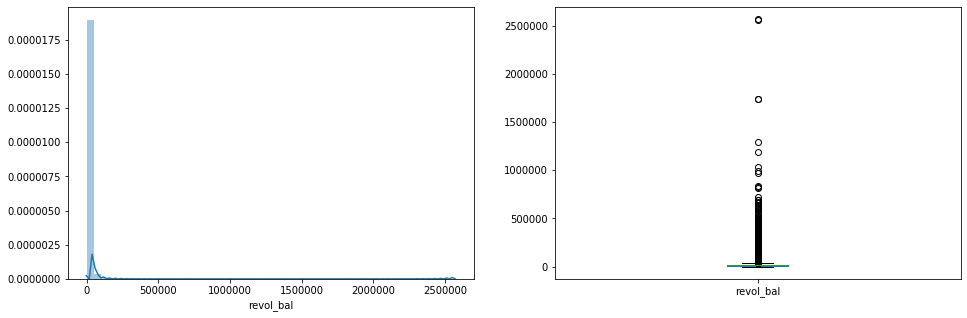

In [51]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_new['revol_bal']);

plt.subplot(122)
train_new['revol_bal'].plot.box(figsize=(16,5))

plt.show()


In [52]:
# Outliers Treatment
#Find mean of the column "revol_bal"
revol_bal_mean = int(train_new['revol_bal'].mean())

#FInd 75th Percentile of the column "revol_bal"
IQR_revol_bal_P75 = train_new['revol_bal'].quantile(q=0.75)

#FInd 25th Percentile of the column "revol_bal"
IQR_revol_bal_P25 = train_new['revol_bal'].quantile(q=0.25)

#FInd IQR of the column "revol_bal"
IQR_revol_bal = IQR_revol_bal_P75-IQR_revol_bal_P25

#Fix boundaries to detect outliers in column "revol_bal"
IQR_LL = int(IQR_revol_bal_P25 - 1.5*IQR_revol_bal)
IQR_UL = int(IQR_revol_bal_P75 + 1.5*IQR_revol_bal)

#treating upper end outier with mean
train_new.loc[train_new['revol_bal']>IQR_UL , 'revol_bal'] = revol_bal_mean

#treating lower end outlier as mean
train_new.loc[train_new['revol_bal']<IQR_LL , 'revol_bal'] = revol_bal_mean
#

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
default_ind=train_new['default_ind']
train_new=train_new.drop(['default_ind'],axis=1)
train_new["default_ind"]=default_ind

In [47]:
default_ind=test_new['default_ind']
test_new=test_new.drop(['default_ind'],axis=1)
test_new["default_ind"]=default_ind


In [48]:
x=train_new.iloc[:,0:27]
y=train_new.iloc[:,-1]

In [49]:
train_new.default_ind.value_counts()

0    406907
1     43093
Name: default_ind, dtype: int64

In [50]:
one=train_new[train_new['default_ind']==1]
zero=train_new[train_new['default_ind']==0]


In [51]:
zero.shape,one.shape

((406907, 28), (43093, 28))

In [52]:
#from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [53]:
#smk=SMOTETomek(random_state=42)
#x_res,y_res=smk.fit_sample(x,y)

In [54]:
nm=NearMiss()
x_res,y_res=nm.fit_sample(x,y)

In [55]:
x_res.shape,y_res.shape

((86186, 27), (86186,))

In [56]:
# Splitting train data:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,random_state=100,test_size=.2)

In [57]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((68948, 27), (17238, 27), (68948,), (17238,))

In [58]:
# Normalizing train data:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [59]:
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test)

# 1. Logistic model

In [60]:
from sklearn.linear_model import LogisticRegression
logmod=LogisticRegression()

In [61]:
logmod.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
log_pred=logmod.predict(X_test)

In [63]:
log_predprob=logmod.predict_proba(X_test)[:,1] # to plot roc

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
log_mat=confusion_matrix(y_test,log_pred)
log_mat

array([[6986, 1635],
       [2435, 6182]], dtype=int64)

In [66]:
log_acc=log_mat.diagonal().sum()/log_mat.sum()*100
log_acc

76.38937231697412

In [58]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77      8621
           1       0.79      0.72      0.75      8617

    accuracy                           0.76     17238
   macro avg       0.77      0.76      0.76     17238
weighted avg       0.77      0.76      0.76     17238



In [59]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [60]:
roc=roc_auc_score(log_pred,y_test)
roc

0.765290953918411

In [61]:
fpr,tpr,threshold=roc_curve(log_pred,y_test)

In [78]:
from sklearn import metrics
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")


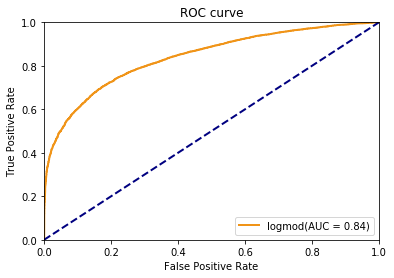

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

In [79]:
plotAUC(y_test,log_predprob, 'logmod')
plt.show()
plt.figure(figsize=(6,6))


# 2. RF model

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [68]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
rf_pred1=rf.predict(x_test)

In [70]:
rf_predprob1=rf.predict_proba(x_test)[:,1] # for ROC curve

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
rf_mat1=confusion_matrix(y_test,rf_pred1)
rf_mat1

array([[7496, 1125],
       [1882, 6735]], dtype=int64)

In [73]:
rf_acc1=rf_mat1.diagonal().sum()/rf_mat1.sum()*100
rf_acc1

82.55598097227056

In [74]:
print(classification_report(y_test, rf_pred1))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      8621
           1       0.86      0.78      0.82      8617

    accuracy                           0.83     17238
   macro avg       0.83      0.83      0.83     17238
weighted avg       0.83      0.83      0.83     17238



In [75]:
roc=roc_auc_score(rf_pred1,y_test)
roc

0.8280938903622087

In [92]:
fpr,tpr,threshold=roc_curve(rf_pred1,y_test)
fpr

array([0.        , 0.20068245, 1.        ])

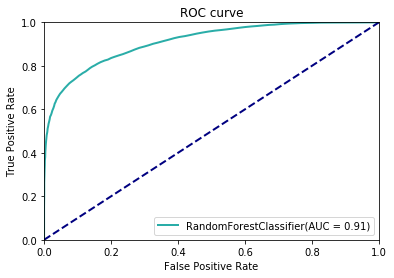

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

In [80]:
plotAUC(y_test,rf_predprob1, 'RandomForestClassifier')
plt.show()
plt.figure(figsize=(6,6))


In [81]:
#rf2 = RandomForestClassifier(n_estimators=200,min_samples_split=30)

In [82]:
#rf2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [90]:
#rf_pred2=rf2.predict(x_test)

In [91]:
#rf_predprob2=rf.predict_proba(x_test)[:,1]# for ROC curve

In [92]:
#rf_mat2=confusion_matrix(y_test,rf_pred2)
#rf_mat2

array([[80995,   317],
       [ 8023,   665]], dtype=int64)

In [93]:
#rf_accr2=rf_mat2.diagonal().sum()/rf_mat2.sum()*100
#rf_accr2

90.73333333333333

In [83]:
#roc=roc_auc_score(rf_pred2,y_test)
#roc

In [84]:
#fpr,tpr,threshold=roc_curve(rf_pred2,y_test)

In [85]:
#plotAUC(y_test,rf_predprob2, 'RandomForestClassifier(n_estimators=200,min_samples_split=30)')
##plt.show()
#plt.figure(figsize=(6,6))


# 3. DT model

In [86]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [87]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [88]:
dt_pred=dt.predict(x_test)

In [89]:
dt_mat=confusion_matrix(y_test,dt_pred)
dt_mat

array([[6522, 2099],
       [2095, 6522]], dtype=int64)

In [90]:
dt_acc=dt_mat.diagonal().sum()/dt_mat.sum()*100
dt_acc

75.67003132613992

In [91]:
dtpred_prob=dt.predict_proba(x_test)[:,1]
dtpred_prob

array([1., 0., 1., ..., 1., 1., 0.])

Text(0, 0.5, 'Frequency')

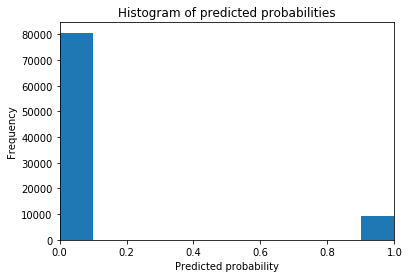

In [110]:
plt.hist(dtpred_prob)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')

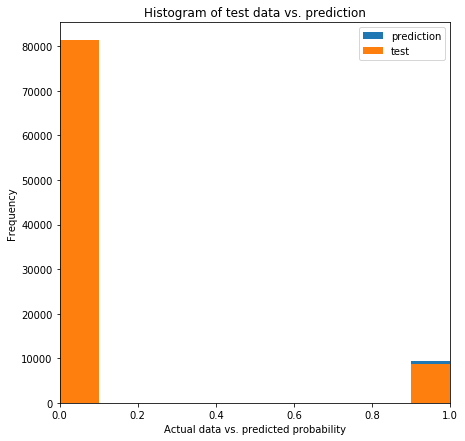

In [111]:
plt.rcParams["figure.figsize"] = [7,7]
plt.hist(dtpred_prob, label='prediction')
plt.hist(y_test, label='test')
plt.xlim(0, 1)
plt.title('Histogram of test data vs. prediction')
plt.xlabel('Actual data vs. predicted probability')
plt.ylabel('Frequency')
plt.legend()

In [112]:
dt.feature_importances_

array([0.05836517, 0.09439236, 0.02856103, 0.05996293, 0.07749311,
       0.00503842, 0.01964208, 0.03233722, 0.03908364, 0.        ,
       0.06963719, 0.0680978 , 0.09959181, 0.02654709, 0.00108582,
       0.00038235, 0.0157896 , 0.05943298, 0.00612494, 0.07040666,
       0.00984531, 0.01162075, 0.        , 0.01845232, 0.05432864,
       0.06744292, 0.00633783])

In [113]:
df_dtree = pd.DataFrame({"Feature_score": list(dt.feature_importances_), 
                         "Feature_name": list(x_train.iloc[:,0:27].columns)})
df_dtree

,Feature_score,Feature_name
0,0.058365,loan_amnt
1,0.094392,int_rate
2,0.028561,emp_length
3,0.059963,annual_inc
4,0.077493,dti
5,0.005038,delinq_2yrs
6,0.019642,inq_last_6mths
7,0.032337,mths_since_last_delinq
8,0.039084,open_acc
9,0.000000,pub_rec


In [93]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      8621
           1       0.76      0.76      0.76      8617

    accuracy                           0.76     17238
   macro avg       0.76      0.76      0.76     17238
weighted avg       0.76      0.76      0.76     17238



In [94]:
roc=roc_auc_score(dt_pred,y_test)
roc

0.7567003540060095

In [95]:
fpr,tpr,threshold=roc_curve(dt_pred,y_test)

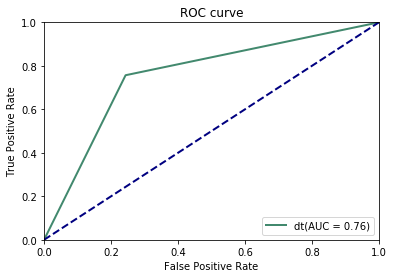

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

In [96]:
plotAUC(y_test,dtpred_prob, 'dt')
plt.show()
plt.figure(figsize=(6,6))


#  4. XGBoost model

In [97]:
from xgboost import  XGBClassifier
xgb=XGBClassifier()

In [98]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [99]:
xgb_pred=xgb.predict(x_test)

In [100]:
xgb_predprob=xgb.predict_proba(x_test)[:,1]

In [101]:
xgb_mat=confusion_matrix(xgb_pred,y_test)
xgb_mat

array([[7645, 2001],
       [ 976, 6616]], dtype=int64)

In [102]:
xgb_acc=xgb_mat.diagonal().sum()/xgb_mat.sum()*100
xgb_acc

82.73001508295626

In [103]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      8621
           1       0.87      0.77      0.82      8617

    accuracy                           0.83     17238
   macro avg       0.83      0.83      0.83     17238
weighted avg       0.83      0.83      0.83     17238



In [104]:
fpr,tpr,threshold=roc_curve(xgb_pred,y_test)

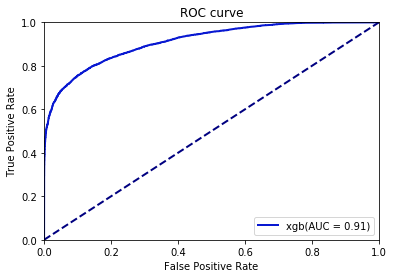

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

In [105]:
plotAUC(y_test,xgb_predprob, 'xgb')
plt.show()
plt.figure(figsize=(6,6))

# RFE for  Feature selection

In [106]:
from sklearn.feature_selection import RFE

In [107]:
rfe = RFE(dt, 15) # selecting top 15 features

In [108]:
rfe.fit(x_train,y_train)

RFE(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features=None, max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     presort='deprecated', random_state=None,
                                     splitter='best'),
    n_features_to_select=15, step=1, verbose=0)

In [109]:
feat_imp = pd.DataFrame({"Feature score": list(rfe.support_), "Columns": x_train.columns})
feat_imp

,Feature score,Columns
0,True,loan_amnt
1,True,int_rate
2,True,emp_length
3,True,annual_inc
4,True,dti
5,False,delinq_2yrs
6,False,inq_last_6mths
7,True,mths_since_last_delinq
8,True,open_acc
9,False,pub_rec


In [110]:
feat_imp.sort_values(["Feature score"], ascending = False)

,Feature score,Columns
0,True,loan_amnt
16,True,tot_coll_amt
2,True,emp_length
3,True,annual_inc
4,True,dti
25,True,earliest_cr_line
24,True,title
7,True,mths_since_last_delinq
8,True,open_acc
19,True,emp_title


In [111]:
new_df = train_new.drop(['tot_coll_amt','home_ownership','verification_status','purpose'], axis=1)
#new_df

In [112]:
new_df.shape

(450000, 24)

In [113]:
x=new_df.iloc[:,0:-1]
y=new_df.iloc[:,-1]

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [115]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((360000, 23), (90000, 23), (360000,), (90000,))

In [116]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [117]:
rf_p=rf.predict(x_test)

In [118]:
rf_predpro=rf.predict_proba(x_test)[:,1]

In [119]:
rfe_mat=confusion_matrix(y_test,rf_p)
rfe_mat

array([[80887,   425],
       [ 7962,   726]], dtype=int64)

In [120]:
rfe_acc=rfe_mat.diagonal().sum()/rfe_mat.sum()*100
rfe_acc

90.68111111111111

In [121]:
print(classification_report(y_test,rf_p))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     81312
           1       0.63      0.08      0.15      8688

    accuracy                           0.91     90000
   macro avg       0.77      0.54      0.55     90000
weighted avg       0.88      0.91      0.87     90000



In [122]:
roc=roc_auc_score(y_test,rf_p)
roc

0.5391683775583198

In [123]:
fpr,tpr,threshold=roc_curve(rf_p,y_test)

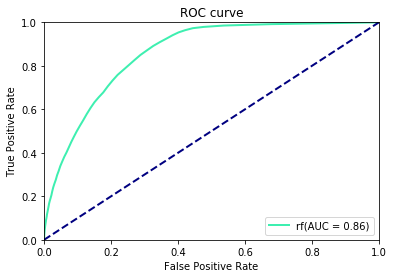

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

In [124]:
plotAUC(y_test,rf_predpro, 'rf')
plt.show()
plt.figure(figsize=(6,6))


# Testing model on another (test file) data

In [125]:
X_trainV=train_new.iloc[:,0:-1]
y_trainV=train_new.iloc[:,-1]
X_testV=test_new.iloc[:,0:-1]
y_testV=test_new.iloc[:,-1]

In [126]:
X_trainV.shape,X_testV.shape,y_trainV.shape,y_testV.shape

((450000, 27), (405969, 27), (450000,), (405969,))

In [127]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [128]:
rf.fit(X_trainV,y_trainV)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [129]:
val_p=rf.predict(X_testV)

In [130]:
y_pred_RF = pd.DataFrame(val_p, columns = ['default_loan'])
y_pred_RF

,default_loan
0,0
1,0
2,0
3,0
4,0
...,...
405964,0
405965,0
405966,0
405967,0


In [131]:
val_mat=confusion_matrix(y_testV,val_p)
val_mat

array([[401252,   1343],
       [  3094,    280]], dtype=int64)

In [166]:
val_acc=val_mat.diagonal().sum()/val_mat.sum()*100
val_acc

98.99746039722245